In [35]:
#https://www.kaggle.com/xiyuewang/lol-how-to-win
# Load packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
%matplotlib inline

In [37]:
df = pd.read_csv('E:/Z-Machine Learning/My Work/DataSets/League of Legends/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [38]:
df_clean = df.copy()

In [39]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

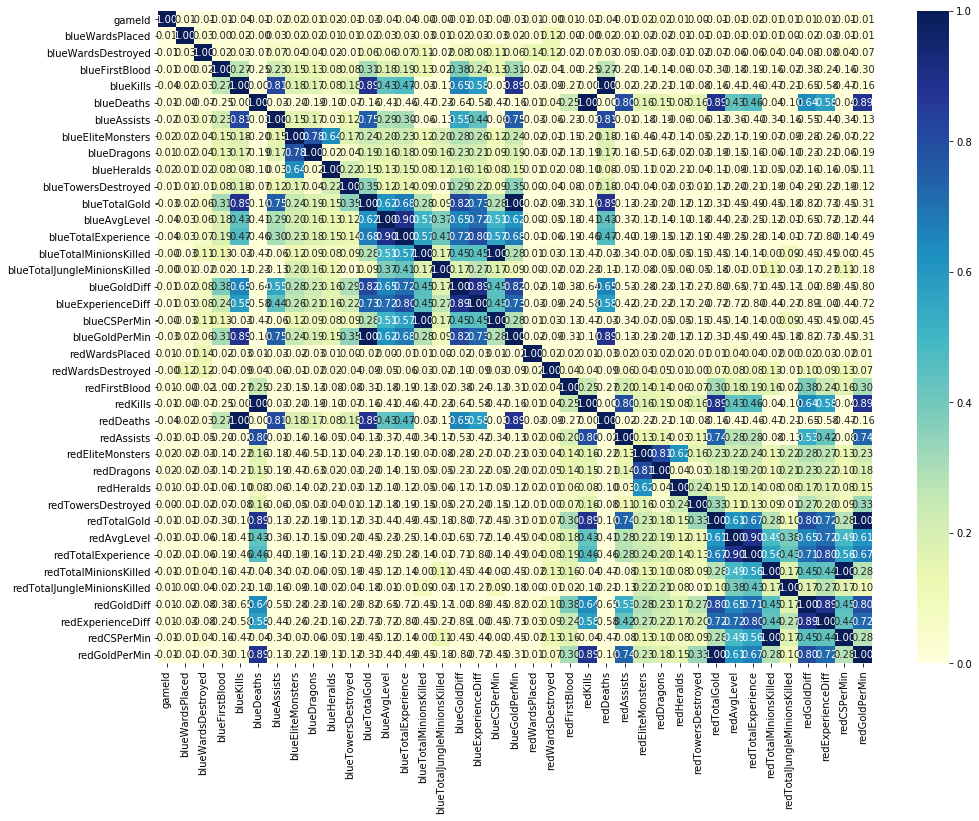

In [40]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [43]:
y = df['blueWins']
df = df.drop(['blueWins','gameId'],axis=1)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#X is your data variable for the training data
scaler.fit(df)
df = scaler.transform(df)


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [50]:
#https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
for i in explained_variance:
    print("%.4f" % i)

0.3387
0.2284
0.1129
0.0886
0.0643
0.0501
0.0413
0.0159
0.0116
0.0082
0.0067
0.0063
0.0045
0.0035
0.0034
0.0029
0.0028
0.0024
0.0023
0.0018
0.0015
0.0007
0.0006
0.0005
0.0004
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000


In [51]:
from sklearn.decomposition import PCA

#here the 8 is the number of dimensions you want to reduce your features to
pca = PCA(n_components=9)

#here data is your data variable
pca.fit(df)

x_pca = pca.transform(df)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [59]:
from tqdm import tqdm
for i in tqdm(range(1,15)):
    print ('number of components is ' , i)
    pca = PCA(n_components=i)
    #here data is your data variable
    pca.fit(df)
    x_pca = pca.transform(df)
    from tensorflow import keras
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(i,)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])  
    model.fit(x_pca, y, epochs=30, batch_size=20)

  0%|          | 0/14 [00:00<?, ?it/s]

number of components is  1
Epoch 1/30
494/494 [==============================] - 0s 852us/step - loss: 0.6307 - accuracy: 0.6627
Epoch 2/30
494/494 [==============================] - 0s 847us/step - loss: 0.6278 - accuracy: 0.66320s - loss: 0.6263 - accu
Epoch 3/30
494/494 [==============================] - 0s 966us/step - loss: 0.6271 - accuracy: 0.6608
Epoch 4/30
494/494 [==============================] - 0s 907us/step - loss: 0.6263 - accuracy: 0.6619
Epoch 5/30
494/494 [==============================] - 0s 903us/step - loss: 0.6251 - accuracy: 0.66250s - loss: 0.6221 - 
Epoch 6/30
494/494 [==============================] - 0s 913us/step - loss: 0.6226 - accuracy: 0.6617
Epoch 7/30
494/494 [==============================] - 0s 914us/step - loss: 0.6208 - accuracy: 0.6612
Epoch 8/30
494/494 [==============================] - 0s 890us/step - loss: 0.6198 - accuracy: 0.6645
Epoch 9/30
494/494 [==============================] - 0s 913us/step - loss: 0.6183 - accuracy: 0.6623
Epoch 10/30

  7%|▋         | 1/14 [00:13<02:59, 13.78s/it]

number of components is  2
Epoch 1/30
494/494 [==============================] - 0s 947us/step - loss: 0.6287 - accuracy: 0.6526
Epoch 2/30
494/494 [==============================] - 0s 896us/step - loss: 0.6108 - accuracy: 0.6621
Epoch 3/30
494/494 [==============================] - 0s 861us/step - loss: 0.5835 - accuracy: 0.6938
Epoch 4/30
494/494 [==============================] - 0s 845us/step - loss: 0.5661 - accuracy: 0.7054
Epoch 5/30
494/494 [==============================] - 0s 842us/step - loss: 0.5605 - accuracy: 0.7099
Epoch 6/30
494/494 [==============================] - 0s 872us/step - loss: 0.5564 - accuracy: 0.7127
Epoch 7/30
494/494 [==============================] - 0s 868us/step - loss: 0.5541 - accuracy: 0.7130
Epoch 8/30
494/494 [==============================] - 0s 873us/step - loss: 0.5536 - accuracy: 0.7157
Epoch 9/30
494/494 [==============================] - 0s 856us/step - loss: 0.5526 - accuracy: 0.7171
Epoch 10/30
494/494 [==============================] - 

 14%|█▍        | 2/14 [00:26<02:43, 13.61s/it]

number of components is  3
Epoch 1/30
494/494 [==============================] - 0s 855us/step - loss: 0.6253 - accuracy: 0.6515
Epoch 2/30
494/494 [==============================] - 0s 827us/step - loss: 0.6094 - accuracy: 0.6649
Epoch 3/30
494/494 [==============================] - 0s 797us/step - loss: 0.5939 - accuracy: 0.6815
Epoch 4/30
494/494 [==============================] - 0s 841us/step - loss: 0.5785 - accuracy: 0.6932
Epoch 5/30
494/494 [==============================] - 0s 852us/step - loss: 0.5661 - accuracy: 0.7057
Epoch 6/30
494/494 [==============================] - 0s 851us/step - loss: 0.5588 - accuracy: 0.7093
Epoch 7/30
494/494 [==============================] - 0s 810us/step - loss: 0.5554 - accuracy: 0.7139
Epoch 8/30
494/494 [==============================] - 0s 839us/step - loss: 0.5479 - accuracy: 0.7197
Epoch 9/30
494/494 [==============================] - 0s 819us/step - loss: 0.5480 - accuracy: 0.7192
Epoch 10/30
494/494 [==============================] - 

 21%|██▏       | 3/14 [00:40<02:28, 13.47s/it]

number of components is  4
Epoch 1/30
494/494 [==============================] - 0s 870us/step - loss: 0.6181 - accuracy: 0.6630
Epoch 2/30
494/494 [==============================] - 0s 832us/step - loss: 0.5817 - accuracy: 0.6944
Epoch 3/30
494/494 [==============================] - 0s 856us/step - loss: 0.5650 - accuracy: 0.7031
Epoch 4/30
494/494 [==============================] - 0s 834us/step - loss: 0.5577 - accuracy: 0.7120
Epoch 5/30
494/494 [==============================] - 0s 853us/step - loss: 0.5560 - accuracy: 0.7123
Epoch 6/30
494/494 [==============================] - 0s 866us/step - loss: 0.5514 - accuracy: 0.7167
Epoch 7/30
494/494 [==============================] - 0s 852us/step - loss: 0.5512 - accuracy: 0.7115
Epoch 8/30
494/494 [==============================] - 0s 834us/step - loss: 0.5499 - accuracy: 0.7179
Epoch 9/30
494/494 [==============================] - 0s 843us/step - loss: 0.5475 - accuracy: 0.7186
Epoch 10/30
494/494 [==============================] - 

 29%|██▊       | 4/14 [00:53<02:15, 13.57s/it]

number of components is  5
Epoch 1/30
494/494 [==============================] - 0s 878us/step - loss: 0.5560 - accuracy: 0.7151
Epoch 2/30
494/494 [==============================] - 0s 821us/step - loss: 0.5361 - accuracy: 0.7279
Epoch 3/30
494/494 [==============================] - 0s 836us/step - loss: 0.5357 - accuracy: 0.7267
Epoch 4/30
494/494 [==============================] - 0s 851us/step - loss: 0.5346 - accuracy: 0.7288
Epoch 5/30
494/494 [==============================] - 0s 844us/step - loss: 0.5338 - accuracy: 0.7263
Epoch 6/30
494/494 [==============================] - 0s 831us/step - loss: 0.5339 - accuracy: 0.7263
Epoch 7/30
494/494 [==============================] - 0s 842us/step - loss: 0.5333 - accuracy: 0.7308
Epoch 8/30
494/494 [==============================] - 0s 847us/step - loss: 0.5335 - accuracy: 0.7278
Epoch 9/30
494/494 [==============================] - 0s 846us/step - loss: 0.5327 - accuracy: 0.7280
Epoch 10/30
494/494 [==============================] - 

 36%|███▌      | 5/14 [01:07<02:02, 13.56s/it]

number of components is  6
Epoch 1/30
494/494 [==============================] - 0s 862us/step - loss: 0.5531 - accuracy: 0.7162
Epoch 2/30
494/494 [==============================] - 0s 830us/step - loss: 0.5379 - accuracy: 0.7240
Epoch 3/30
494/494 [==============================] - 0s 845us/step - loss: 0.5359 - accuracy: 0.7249
Epoch 4/30
494/494 [==============================] - 0s 855us/step - loss: 0.5350 - accuracy: 0.7253
Epoch 5/30
494/494 [==============================] - 0s 868us/step - loss: 0.5339 - accuracy: 0.7290
Epoch 6/30
494/494 [==============================] - 0s 863us/step - loss: 0.5336 - accuracy: 0.7268
Epoch 7/30
494/494 [==============================] - 0s 832us/step - loss: 0.5343 - accuracy: 0.72700s - loss: 0.5276 - accura
Epoch 8/30
494/494 [==============================] - 0s 848us/step - loss: 0.5322 - accuracy: 0.7278
Epoch 9/30
494/494 [==============================] - 0s 856us/step - loss: 0.5326 - accuracy: 0.7272
Epoch 10/30
494/494 [========

 43%|████▎     | 6/14 [01:20<01:47, 13.39s/it]

number of components is  7
Epoch 1/30
494/494 [==============================] - 0s 887us/step - loss: 0.5513 - accuracy: 0.7180
Epoch 2/30
494/494 [==============================] - 0s 838us/step - loss: 0.5369 - accuracy: 0.7264
Epoch 3/30
494/494 [==============================] - 0s 852us/step - loss: 0.5347 - accuracy: 0.7279
Epoch 4/30
494/494 [==============================] - 0s 828us/step - loss: 0.5333 - accuracy: 0.7260
Epoch 5/30
494/494 [==============================] - 0s 828us/step - loss: 0.5339 - accuracy: 0.7281
Epoch 6/30
494/494 [==============================] - 0s 853us/step - loss: 0.5321 - accuracy: 0.7265
Epoch 7/30
494/494 [==============================] - 0s 837us/step - loss: 0.5319 - accuracy: 0.7275
Epoch 8/30
494/494 [==============================] - 0s 830us/step - loss: 0.5314 - accuracy: 0.7274
Epoch 9/30
494/494 [==============================] - 0s 836us/step - loss: 0.5322 - accuracy: 0.7302
Epoch 10/30
494/494 [==============================] - 

 50%|█████     | 7/14 [01:33<01:33, 13.40s/it]

number of components is  8
Epoch 1/30
494/494 [==============================] - 0s 870us/step - loss: 0.5523 - accuracy: 0.7131
Epoch 2/30
494/494 [==============================] - 0s 861us/step - loss: 0.5357 - accuracy: 0.7276
Epoch 3/30
494/494 [==============================] - 0s 860us/step - loss: 0.5345 - accuracy: 0.7277
Epoch 4/30
494/494 [==============================] - 0s 862us/step - loss: 0.5327 - accuracy: 0.7281
Epoch 5/30
494/494 [==============================] - 0s 941us/step - loss: 0.5324 - accuracy: 0.7269
Epoch 6/30
494/494 [==============================] - 0s 997us/step - loss: 0.5315 - accuracy: 0.7286
Epoch 7/30
494/494 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7295
Epoch 8/30
494/494 [==============================] - 0s 988us/step - loss: 0.5302 - accuracy: 0.7286
Epoch 9/30
494/494 [==============================] - 0s 958us/step - loss: 0.5300 - accuracy: 0.7273
Epoch 10/30
494/494 [==============================] - 0s

 57%|█████▋    | 8/14 [01:47<01:20, 13.49s/it]

number of components is  9
Epoch 1/30
494/494 [==============================] - 0s 863us/step - loss: 0.5500 - accuracy: 0.7204
Epoch 2/30
494/494 [==============================] - 0s 848us/step - loss: 0.5355 - accuracy: 0.7278
Epoch 3/30
494/494 [==============================] - 0s 854us/step - loss: 0.5344 - accuracy: 0.7257
Epoch 4/30
494/494 [==============================] - 0s 845us/step - loss: 0.5319 - accuracy: 0.7300
Epoch 5/30
494/494 [==============================] - 0s 993us/step - loss: 0.5312 - accuracy: 0.7274
Epoch 6/30
494/494 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7281
Epoch 7/30
494/494 [==============================] - 0s 988us/step - loss: 0.5303 - accuracy: 0.7271
Epoch 8/30
494/494 [==============================] - 0s 885us/step - loss: 0.5295 - accuracy: 0.7296
Epoch 9/30
494/494 [==============================] - 0s 878us/step - loss: 0.5293 - accuracy: 0.7312
Epoch 10/30
494/494 [==============================] - ET

 64%|██████▍   | 9/14 [02:01<01:08, 13.61s/it]

number of components is  10
Epoch 1/30
494/494 [==============================] - 0s 875us/step - loss: 0.5530 - accuracy: 0.7188
Epoch 2/30
494/494 [==============================] - 0s 857us/step - loss: 0.5345 - accuracy: 0.7313
Epoch 3/30
494/494 [==============================] - 0s 887us/step - loss: 0.5329 - accuracy: 0.7275
Epoch 4/30
494/494 [==============================] - 0s 852us/step - loss: 0.5309 - accuracy: 0.7279
Epoch 5/30
494/494 [==============================] - 0s 874us/step - loss: 0.5306 - accuracy: 0.7287
Epoch 6/30
494/494 [==============================] - 0s 835us/step - loss: 0.5297 - accuracy: 0.7318
Epoch 7/30
494/494 [==============================] - 0s 852us/step - loss: 0.5290 - accuracy: 0.7292
Epoch 8/30
494/494 [==============================] - 0s 839us/step - loss: 0.5282 - accuracy: 0.7304
Epoch 9/30
494/494 [==============================] - 0s 845us/step - loss: 0.5278 - accuracy: 0.7311
Epoch 10/30
494/494 [==============================] -

 71%|███████▏  | 10/14 [02:15<00:54, 13.62s/it]

number of components is  11
Epoch 1/30
494/494 [==============================] - 0s 873us/step - loss: 0.5538 - accuracy: 0.7141
Epoch 2/30
494/494 [==============================] - 0s 847us/step - loss: 0.5343 - accuracy: 0.7276
Epoch 3/30
494/494 [==============================] - 0s 847us/step - loss: 0.5327 - accuracy: 0.7281
Epoch 4/30
494/494 [==============================] - 0s 853us/step - loss: 0.5299 - accuracy: 0.7292
Epoch 5/30
494/494 [==============================] - 0s 844us/step - loss: 0.5300 - accuracy: 0.7299
Epoch 6/30
494/494 [==============================] - 0s 844us/step - loss: 0.5284 - accuracy: 0.7263
Epoch 7/30
494/494 [==============================] - 0s 869us/step - loss: 0.5277 - accuracy: 0.7277
Epoch 8/30
494/494 [==============================] - 0s 856us/step - loss: 0.5272 - accuracy: 0.7298
Epoch 9/30
494/494 [==============================] - 0s 841us/step - loss: 0.5270 - accuracy: 0.7311
Epoch 10/30
494/494 [==============================] -

 79%|███████▊  | 11/14 [02:28<00:40, 13.58s/it]

number of components is  12
Epoch 1/30
494/494 [==============================] - 0s 868us/step - loss: 0.5528 - accuracy: 0.7133
Epoch 2/30
494/494 [==============================] - 0s 844us/step - loss: 0.5337 - accuracy: 0.7275
Epoch 3/30
494/494 [==============================] - 0s 868us/step - loss: 0.5315 - accuracy: 0.7278
Epoch 4/30
494/494 [==============================] - 0s 849us/step - loss: 0.5300 - accuracy: 0.7313
Epoch 5/30
494/494 [==============================] - 0s 839us/step - loss: 0.5289 - accuracy: 0.72820s - loss: 0.5291 - accuracy
Epoch 6/30
494/494 [==============================] - 0s 857us/step - loss: 0.5280 - accuracy: 0.7344
Epoch 7/30
494/494 [==============================] - 0s 859us/step - loss: 0.5272 - accuracy: 0.7323
Epoch 8/30
494/494 [==============================] - 0s 864us/step - loss: 0.5259 - accuracy: 0.7311
Epoch 9/30
494/494 [==============================] - 0s 860us/step - loss: 0.5253 - accuracy: 0.7276
Epoch 10/30
494/494 [=====

 86%|████████▌ | 12/14 [02:42<00:27, 13.62s/it]

number of components is  13
Epoch 1/30
494/494 [==============================] - 0s 872us/step - loss: 0.5515 - accuracy: 0.7178
Epoch 2/30
494/494 [==============================] - 0s 842us/step - loss: 0.5339 - accuracy: 0.7276
Epoch 3/30
494/494 [==============================] - 0s 864us/step - loss: 0.5322 - accuracy: 0.7299
Epoch 4/30
494/494 [==============================] - 0s 845us/step - loss: 0.5302 - accuracy: 0.7320
Epoch 5/30
494/494 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7305
Epoch 6/30
494/494 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7315
Epoch 7/30
494/494 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7329
Epoch 8/30
494/494 [==============================] - 0s 909us/step - loss: 0.5260 - accuracy: 0.7332
Epoch 9/30
494/494 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7300
Epoch 10/30
494/494 [==============================] - 1s 1ms/

 93%|█████████▎| 13/14 [02:56<00:13, 13.90s/it]

number of components is  14
Epoch 1/30
494/494 [==============================] - 0s 886us/step - loss: 0.5536 - accuracy: 0.7160
Epoch 2/30
494/494 [==============================] - 0s 847us/step - loss: 0.5334 - accuracy: 0.7294
Epoch 3/30
494/494 [==============================] - 0s 976us/step - loss: 0.5312 - accuracy: 0.7303
Epoch 4/30
494/494 [==============================] - 0s 893us/step - loss: 0.5309 - accuracy: 0.7293
Epoch 5/30
494/494 [==============================] - 0s 857us/step - loss: 0.5290 - accuracy: 0.7309
Epoch 6/30
494/494 [==============================] - 0s 861us/step - loss: 0.5275 - accuracy: 0.7322
Epoch 7/30
494/494 [==============================] - 0s 872us/step - loss: 0.5264 - accuracy: 0.7302
Epoch 8/30
494/494 [==============================] - 0s 855us/step - loss: 0.5253 - accuracy: 0.7333
Epoch 9/30
494/494 [==============================] - 0s 897us/step - loss: 0.5245 - accuracy: 0.7345
Epoch 10/30
494/494 [==============================] -

100%|██████████| 14/14 [03:10<00:00, 13.59s/it]
